**Laboratorio de métodos computacionales**

**Universidad de los Andes**

**Profesor: Diego Alberto Castro Rodríguez**

## Cadenas de Markov

Una cadena de Markov es un objeto matemático que consiste en una secuencia de estados y un conjunto de probabilidades que describen las transiciones entre esos estados. La característica principal que tiene esta cadena es que la probabilidad de moverse a otros estados depende solamente del estado actual. Dada una cadena, se puede realizar una caminata aleatoria eligiendo un punto de partida y moviéndose a otros estados siguiendo las probabilidades de transición. 

### Caminata aleatoria en un grafo

cadena de Marcov de cuatro estados:

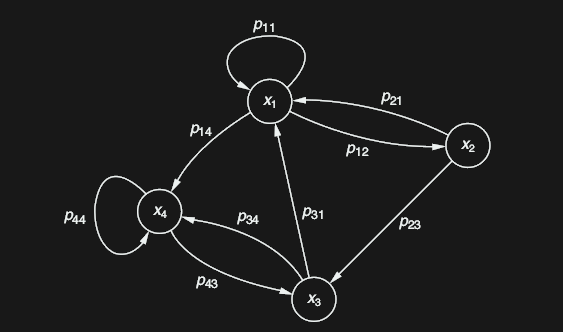

$$P = \begin{bmatrix}
p_{11} & p_{12} & 0 & p_{14} \\ 
p_{21} & 0  & p_{23} & 0 \\
p_{31} & 0  & 0 & p_{34} \\
0 & 0  & p_{43} & p_{44} 
\end{bmatrix}$$

### La distribución invariante

$$P = \begin{bmatrix}
0.3 & 0.2 & 0.5 \\ 
0.4 & 0.3 & 0.3 \\ 
0.3 & 0.4 & 0.3  
\end{bmatrix}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
P = np.array([[0.3, 0.2, 0.5],
              [0.4, 0.3, 0.3],
              [0.3, 0.4, 0.3]])

p1 = np.array([0.9, 0.1, 0])

for i in range(1,13):
  p_i = P @ p1
  print('p_{} = {}'.format(i, p1))
  p1 = p_i

p_1 = [0.9 0.1 0. ]
p_2 = [0.29 0.39 0.31]
p_3 = [0.32  0.326 0.336]
p_4 = [0.3292 0.3266 0.3272]
p_5 = [0.32768 0.32782 0.32756]
p_6 = [0.327648 0.327686 0.3277  ]
p_7 = [0.3276816 0.327675  0.3276788]
p_8 = [0.32767888 0.32767878 0.32767812]
p_9 = [0.32767848 0.32767862 0.32767861]
p_10 = [0.32767857 0.32767856 0.32767858]
p_11 = [0.32767857 0.32767857 0.32767857]
p_12 = [0.32767857 0.32767857 0.32767857]


## Algoritmo Metropolis-Hastings

El algoritmo Metropolis-Hastings puede extraer muestras de cualquier distribución de probabilidad $P (x)$, siempre que sepamos una función $f (x)$ proporcional a la densidad de probabilidad $P$ y los valores de $f (x)$ se puedan calcular.

si $Q$ es una densidad de probabilidad arbitraria que sugiere un candidato para el siguiente valor de muestra $x_{\text{new}}$ dado el valor de muestra anterior $x_{\text{old}}$, se tiene

$$ a = \frac{P(x_{\text{new}})}{P(x_{\text{old}})}\frac{Q(x_{\text{old}}|x_{\text{new}})}{Q(x_{\text{new}}|x_{\text{old}})} = \frac{f(x_{\text{new}})}{f(x_{\text{old}})}\frac{Q(x_{\text{old}}|x_{\text{new}})}{Q(x_{\text{new}}|x_{\text{old}})} $$

donde $a$ es el criterio de aceptación que se compara con un número aleatorio entre 0 y 1 (seleccionado de una distribución uniforme) para rechazar o aceptar el candidato $x_{\text{new}}$. Si $Q$ es simétrica, $Q(x_{\text{new}}|x_{\text{old}}) = Q(x_{\text{old}}|x_{\text{new}})$ y $a$ se puede calcular como

$$ a = \frac{f(x_{\text{new}})}{f(x_{\text{old}})} $$


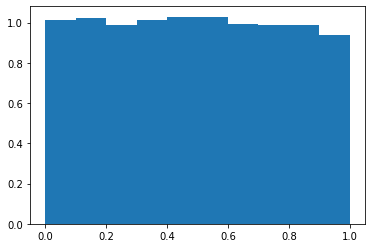

In [2]:
#ejemplo distribución uniforme
import matplotlib.pyplot as plt

x = np.random.rand(10000)
plt.hist(x,bins = 10, density=True)
plt.show()

In [3]:
def metropolis(distribucion, steps=10000, x_ini=0.1):
  muestras = np.zeros(steps)
  old_x = x_ini
  old_fx = distribucion(old_x)

  for i in range(steps):
    new_x = old_x + np.random.normal(0, 0.5)
    new_fx = distribucion(new_x)
    aceptacion = new_fx / old_fx
    if aceptacion >= np.random.rand():
      muestras[i] = new_x
      old_x = new_x
      old_fx = new_fx
    else:
      muestras[i] = old_x

  return muestras
  
def graficar_distribucion(samples, distribucion, bins, x_ini, x_fin):
  x = np.linspace(x_ini, x_fin,1000)
  y = distribucion(x)
  plt.figure(figsize =(10,6) )
  plt.xlim(x_ini, x_fin)
  plt.plot(x,y,'r')
  plt.hist(samples,bins = bins, density = True)

**Ejemplo:** encontrar un conjunto de números aleatorios $X$ que siga la distribucion de Cauchy con $\gamma = 1$ y $x_0 = 0$
$$
f(x; x_0,\gamma) = { 1 \over \pi } \left[ { \gamma \over (x - x_0)^2 + \gamma^2  } \right]
$$

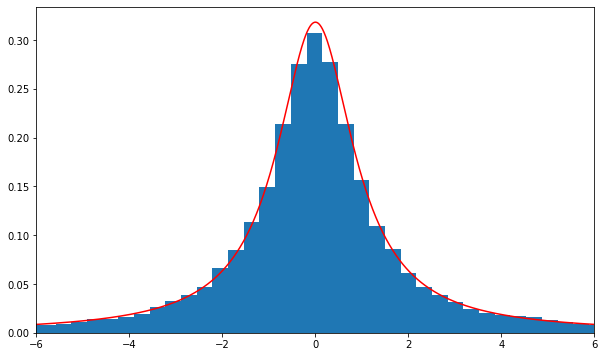

In [4]:
def distribucion_cauchy(x):
  return 1/(np.pi*(1 + x**2))

samples = metropolis(distribucion_cauchy, 100000)
graficar_distribucion(samples, distribucion_cauchy, 200, -6, 6)

**Ejemplo:** encontrar un conjunto de números aleatorios $X$ que siga la distribucion de Laplace con $\beta = 3$ y $\mu = 0$


$$ f(x;\mu,b) = \frac{1}{2b} \exp \left( -\frac{|x-\mu|}{b} \right) $$

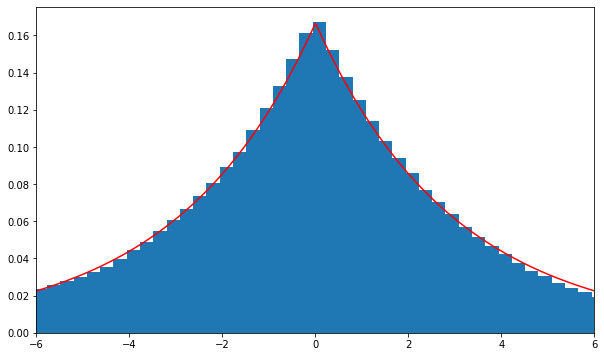

In [5]:
def distribucion_laplace(x):
  b = 3
  mu = 0
  return np.exp(-abs(x - mu)/b)/(2*b)

samples = metropolis(distribucion_laplace, 1000000)
graficar_distribucion(samples, distribucion_laplace, 200, -6, 6)